# Examen

## Question 1

In [161]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def GET():
    toto = np.load("./data.npy")
    b = toto[:, 0]
    A = np.copy(toto)
    A[:, 0] = 1
    return A, b

In [3]:
A, b = GET()
print(np.linalg.norm(A), np.linalg.norm(b))

4438.622823297785 324.75062740509065


In [4]:
A.shape

(252, 14)

## Question 2

In [5]:
def f(x):
    return 0.5*np.linalg.norm(A@x - b, 2)**2

In [6]:
def gradf(x):
    return A.T@A@x - A.T@b

In [7]:
def Hessf(x):
    return A.T@A

In [8]:
A, b = GET()
n = 14
np.random.seed(10)
y = np.random.randn(n)

print('Testf', f(y).shape, np.linalg.norm(f(y)))
print('TestGradf', gradf(y).shape, np.linalg.norm(gradf(y)))
print('TestHessf', Hessf(y).shape, np.linalg.norm(Hessf(y)))

Testf () 7733636.118318958
TestGradf (14,) 17319676.34630816
TestHessf (14, 14) 19592934.364495266


## Question 3

In [9]:
def least_square(A, b):
    return np.linalg.solve(A.T@A, A.T@b)

In [10]:
least_square(A, b).shape

(14,)

In [74]:
A, b = GET()
x = least_square(A, b)
print('LS', np.linalg.norm(x), f(x))
#LS 15.40651626417451 1892.5678738066536

LS 15.40651626419454 1892.567873806654


In [75]:
x

array([-1.52925491e+01,  5.67861579e-02, -8.03098594e-02, -6.46002829e-02,
       -4.37540900e-01, -2.36033328e-02,  8.85429029e-01, -1.98418618e-01,
        2.31895419e-01, -1.16767901e-02,  1.63535902e-01,  1.52798942e-01,
        4.30488745e-01, -1.47653692e+00])

## Question 4

In [123]:
def gradient(x0, step, tol=1.e-6, nitermax=1000):
    k = 0
    xk = x0
    convergence = False

    while not(convergence) and k<nitermax:
        k += 1
        direction = -gradf(xk)
        xk = xk + step*direction
        convergence = (np.linalg.norm(direction) < tol)
    
    return xk


In [129]:
A, b = GET()
x0 = np.zeros(n)
x = gradient(x0=x0, step=0.0000001, tol=1.e-6, nitermax=1000)
print('LS', np.linalg.norm(x), f(x))
#LS 15.40651626417451 1892.5678738066536

LS 0.4396432077397727 2765.0505665512037


In [121]:
for i in range(100, 1000):
    x = gradient(x0=x0, step=i*1.e-9, tol=1.e-6, nitermax=1000)
    if ( np.linalg.norm(gradf(x)) < 1.e-6) == True:
        print(i)


/var/folders/kp/mln_2kkn7wj58h31dbd2jsx40000gn/T/ipykernel_2983/3391432448.py:2: RuntimeWarning: overflow encountered in matmul
  return A.T@A@x - A.T@b
/var/folders/kp/mln_2kkn7wj58h31dbd2jsx40000gn/T/ipykernel_2983/3862839984.py:9: RuntimeWarning: invalid value encountered in add
  xk = xk + step*direction


## Question 5

In [138]:
def GET2():
    A, b = GET()
    for i in range(1, A.shape[1]):
        A[:, i] = A[:, i]-A.shape[0]/np.sum(A[:, i])
    for i in range(A.shape[1]):
        A[:, i] /= np.linalg.norm(A[:, i])
    return A, b


A, b = GET()
A2, b = GET2()
print( np.linalg.cond(A.T.dot(A)) , np.linalg.cond(A2.T.dot(A2)) ) 
#318177392.581283 100139.66608469417


318177392.5924107 100139.66608482631


## Question 6

In [139]:
A, b = GET2()
x0 = np.zeros(n)
x = gradient(x0, 1.e-1, nitermax=4.e5)
print(np.linalg.norm(x-least_square(A, b)))
#0.0200449843931244


0.02004498477788909


## Question 7

In [167]:
eps = 1.e-3
c = 1


In [174]:
def g(x):
    return eps*np.sum([np.math.sqrt(1+(xi/eps)) for xi in x]) - c


In [175]:
def sign(x):
    if x < 0:
        return -1
    elif x > 0:
        return +1
    else:
        return +1  # Non dérivable en 0


-0.0019999999903075653

In [183]:
def gradg(x):
    return eps*np.sum([xi/np.math.sqrt(1+(xi/eps)**2) for xi in x])
    


In [184]:
def gradient2(x0, step, lamb=0, tol=1.e-6, nitermax=1000):
    k = 0
    xk = x0
    convergence = False

    while not(convergence) and k < nitermax:
        k += 1
        direction = - (gradf(xk) + lamb*gradg(xk))
        xk = xk + step*direction
        convergence = (np.linalg.norm(direction) < tol)

    return xk


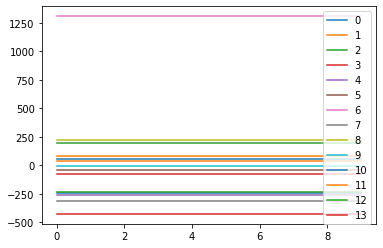

In [185]:
res = np.zeros((10, 14))
for i in range(10):
    x2 = least_square(A, b)
    tmp = gradient2(x2, 1.e-2, lamb=i/5., nitermax=1e5)
    res[i, :] = tmp
for i in range(14):
    plt.plot(range(10), res[:, i], label=str(i))
plt.legend()
plt.show()
